# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.147127e+01     1.729777e+01
 * time: 0.0036008358001708984
     1     6.173328e+01     1.100056e+01
 * time: 0.011090993881225586
     2     5.637239e+01     1.366711e+01
 * time: 0.09083294868469238
     3     4.039107e+01     1.061412e+01
 * time: 0.11452198028564453
     4     3.005527e+01     9.491463e+00
 * time: 0.13724899291992188
     5     2.349094e+01     7.579847e+00
 * time: 0.15713191032409668
     6     2.344061e+01     8.951056e+00
 * time: 0.21444082260131836
     7     1.256387e+01     4.758681e+00
 * time: 0.23211097717285156
     8     7.814590e+00     3.758887e+00
 * time: 0.24891185760498047
     9     6.970721e+00     1.847758e+00
 * time: 0.26575183868408203
    10     6.475969e+00     1.560887e+00
 * time: 0.28197479248046875
    11     6.272127e+00     2.907870e+00
 * time: 0.2948927879333496
    12     6.028709e+00     1.377458e+00
 * time: 0.34099698066711426
    13     5.901331e+00     1.213385e+00
 * tim

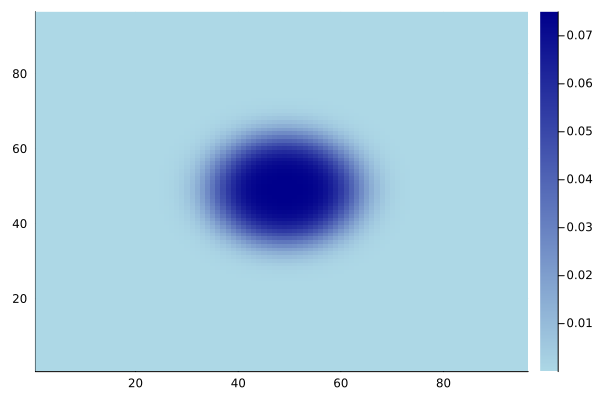

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)